In [3]:
# Importing Analysis Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for saving the model
import pickle

In [4]:
# Importing ML Libraries

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error

In [5]:
# Load the data
data = pd.read_csv('CreditCardData.csv')

In [6]:
data.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [7]:
online_data=data[data['Type of Transaction']=='Online']
online_data.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
6,#3652 191,13-Oct-20,Tuesday,18,Visa,CVC,£231,Online,Children,United Kingdom,United Kingdom,United Kingdom,M,39.5,Barclays,0
7,#3161 927,13-Oct-20,Tuesday,18,MasterCard,CVC,£154,Online,Services,USA,USA,United Kingdom,M,37.8,HSBC,0
16,#3513 029,13-Oct-20,Tuesday,0,MasterCard,CVC,£25,Online,Food,Russia,Russia,United Kingdom,M,54.3,Barlcays,1
17,#3173 400,14-Oct-20,Wednesday,21,Visa,CVC,£242,Online,Services,United Kingdom,United Kingdom,United Kingdom,M,62.0,Barlcays,0


In [8]:
online_data.shape

(33481, 16)

In [9]:
online_data.isnull().sum()

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    3
Type of Transaction       0
Merchant Group            5
Country of Transaction    0
Shipping Address          2
Country of Residence      0
Gender                    2
Age                       0
Bank                      0
Fraud                     0
dtype: int64

In [10]:
online_data.dropna(inplace=True)

C:\Users\Windows User\AppData\Local\Temp\ipykernel_9548\3575859064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_data.dropna(inplace=True)


In [11]:
online_data.shape

(33470, 16)

In [12]:
online_data.isnull().sum()

Transaction ID            0
Date                      0
Day of Week               0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

In [13]:
online_data.duplicated().sum()

0

In [14]:
online_data['Amount']= online_data['Amount'].apply(lambda x:x.replace('£',''))

C:\Users\Windows User\AppData\Local\Temp\ipykernel_9548\404104221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_data['Amount']= online_data['Amount'].apply(lambda x:x.replace('£',''))


In [15]:
online_data['Fraud'].value_counts()

0    30271
1     3199
Name: Fraud, dtype: int64

In [16]:
online_data=online_data.drop(['Transaction ID','Date','Day of Week','Type of Transaction'],axis=1)

In [17]:
# Create a single instance of LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns to be encoded
categorical_columns = ['Type of Card', 'Merchant Group', 'Country of Transaction', 'Shipping Address', 'Country of Residence', 'Gender', 'Bank']

# Apply LabelEncoder to each column in the list
for column in categorical_columns:
    online_data[column] = label_encoder.fit_transform(online_data[column])

    # Print the mapping between original values and numerical labels for each column
    print(f"Mapping for '{column}':")
    for original_value, numerical_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"{original_value} -> {numerical_label}")
    print()

Mapping for 'Type of Card':
MasterCard -> 0
Visa -> 1

Mapping for 'Merchant Group':
Children -> 0
Electronics -> 1
Entertainment -> 2
Fashion -> 3
Food -> 4
Gaming -> 5
Products -> 6
Restaurant -> 7
Services -> 8
Subscription -> 9

Mapping for 'Country of Transaction':
China -> 0
India -> 1
Russia -> 2
USA -> 3
United Kingdom -> 4

Mapping for 'Shipping Address':
China -> 0
India -> 1
Russia -> 2
USA -> 3
United Kingdom -> 4

Mapping for 'Country of Residence':
China -> 0
India -> 1
Russia -> 2
USA -> 3
United Kingdom -> 4

Mapping for 'Gender':
F -> 0
M -> 1

Mapping for 'Bank':
Barclays -> 0
Barlcays -> 1
HSBC -> 2
Halifax -> 3
Lloyds -> 4
Metro -> 5
Monzo -> 6
RBS -> 7



In [18]:
online_data.head()

,Time,Type of Card,Entry Mode,Amount,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,23,1,CVC,91,1,3,3,4,1,38.0,3,1
6,18,1,CVC,231,0,4,4,4,1,39.5,0,0
7,18,0,CVC,154,8,3,3,4,1,37.8,2,0
16,0,0,CVC,25,4,2,2,4,1,54.3,1,1
17,21,1,CVC,242,8,4,4,4,1,62.0,1,0


In [19]:
online_data=online_data.drop(['Entry Mode'],axis=1)

In [20]:
online_data.head()

,Time,Type of Card,Amount,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
4,23,1,91,1,3,3,4,1,38.0,3,1
6,18,1,231,0,4,4,4,1,39.5,0,0
7,18,0,154,8,3,3,4,1,37.8,2,0
16,0,0,25,4,2,2,4,1,54.3,1,1
17,21,1,242,8,4,4,4,1,62.0,1,0


In [21]:
X = online_data.drop('Fraud',axis=1)
y = online_data['Fraud']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [24]:
print(f'X_train: {X_train_resampled.shape}')
print(f'Y_train: {y_train_resampled.shape}')
print(f'X_test: {X_test.shape}')
print(f'Y_test: {y_test.shape}')

X_train: (48346, 10)
Y_train: (48346,)
X_test: (6694, 10)
Y_test: (6694,)


In [25]:
# Assuming y_train is a pandas Series or a NumPy array
original_class_distribution = pd.Series(y_train).value_counts()

# Display the original class distribution
print("Original Class Distribution:")
print(original_class_distribution)

# Assuming y_train_resampled is a pandas Series or a NumPy array after SMOTE
resampled_class_distribution = pd.Series(y_train_resampled).value_counts()

# Display the resampled class distribution
print("\nResampled Class Distribution:")
print(resampled_class_distribution)

Original Class Distribution:
0    24173
1     2603
Name: Fraud, dtype: int64

Resampled Class Distribution:
0    24173
1    24173
Name: Fraud, dtype: int64


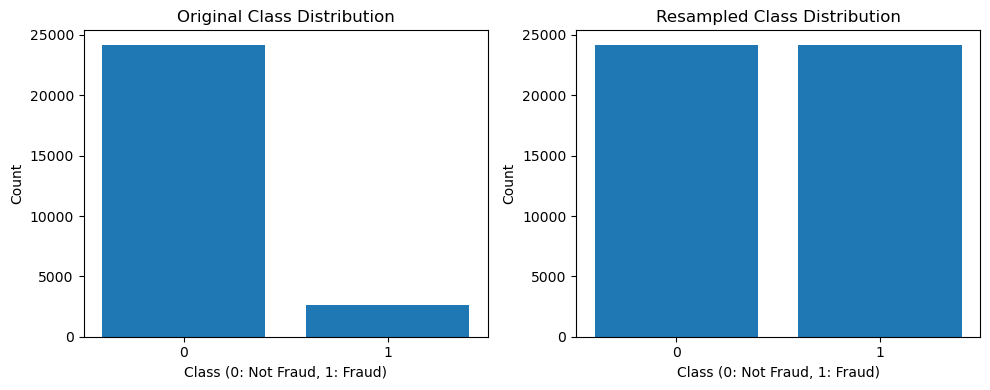

In [26]:
# Plotting the class distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plotting the original class distribution
ax1.bar(original_class_distribution.index, original_class_distribution.values)
ax1.set_title('Original Class Distribution')
ax1.set_xlabel('Class (0: Not Fraud, 1: Fraud)')
ax1.set_ylabel('Count')

# Setting explicit x-axis ticks for the original class distribution
ax1.set_xticks([0, 1])

# Plotting the resampled class distribution
ax2.bar(resampled_class_distribution.index, resampled_class_distribution.values)
ax2.set_title('Resampled Class Distribution')
ax2.set_xlabel('Class (0: Not Fraud, 1: Fraud)')
ax2.set_ylabel('Count')

# Setting explicit x-axis ticks for the resampled class distribution
ax2.set_xticks([0, 1])

plt.tight_layout()
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9515984463698834
Confusion Matrix:
[[5872  226]
 [  98  498]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6098
           1       0.69      0.84      0.75       596

    accuracy                           0.95      6694
   macro avg       0.84      0.90      0.86      6694
weighted avg       0.96      0.95      0.95      6694



c:\Users\Windows User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_resampled, y_train_resampled)
y_pred_decision_tree = decision_tree_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_decision_tree)
confusion = confusion_matrix(y_test, y_pred_decision_tree)
classification_rep = classification_report(y_test, y_pred_decision_tree)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9672841350463102
Confusion Matrix:
[[5951  147]
 [  72  524]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6098
           1       0.78      0.88      0.83       596

    accuracy                           0.97      6694
   macro avg       0.88      0.93      0.90      6694
weighted avg       0.97      0.97      0.97      6694



In [29]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_resampled, y_train_resampled)
y_pred_adaboost = adaboost_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred_adaboost)
confusion = confusion_matrix(y_test, y_pred_adaboost)
classification_rep = classification_report(y_test, y_pred_adaboost)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9553331341499851
Confusion Matrix:
[[5849  249]
 [  50  546]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      6098
           1       0.69      0.92      0.79       596

    accuracy                           0.96      6694
   macro avg       0.84      0.94      0.88      6694
weighted avg       0.96      0.96      0.96      6694



In [30]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_resampled, y_train_resampled)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_random_forest)
confusion_rf = confusion_matrix(y_test, y_pred_random_forest)
classification_rep_rf = classification_report(y_test, y_pred_random_forest)

print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Confusion Matrix:')
print(confusion_rf)
print('Random Forest Classification Report:')
print(classification_rep_rf)

Random Forest Accuracy: 0.9750522856289214
Random Forest Confusion Matrix:
[[5995  103]
 [  64  532]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6098
           1       0.84      0.89      0.86       596

    accuracy                           0.98      6694
   macro avg       0.91      0.94      0.93      6694
weighted avg       0.98      0.98      0.98      6694



In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Use the best parameters to create a new Random Forest model
best_random_forest_model = RandomForestClassifier(**best_params)
best_random_forest_model.fit(X_train_resampled, y_train_resampled)
y_pred_best_rf = best_random_forest_model.predict(X_test)

# Evaluate the model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
confusion_best_rf = confusion_matrix(y_test, y_pred_best_rf)
classification_rep_best_rf = classification_report(y_test, y_pred_best_rf)

print(f'Best Random Forest Accuracy: {accuracy_best_rf}')
print('Best Random Forest Confusion Matrix:')
print(confusion_best_rf)
print('Best Random Forest Classification Report:')
print(classification_rep_best_rf)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Accuracy: 0.9749028981177174
Best Random Forest Confusion Matrix:
[[5992  106]
 [  62  534]]
Best Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6098
           1       0.83      0.90      0.86       596

    accuracy                           0.97      6694
   macro avg       0.91      0.94      0.93      6694
weighted avg       0.98      0.97      0.98      6694



In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Use the best parameters to create a new Random Forest model
best_random_forest_model = RandomForestClassifier(**best_params)
best_random_forest_model.fit(X_train_resampled, y_train_resampled)

# Adjust the threshold (example: set it to 0.4)
y_pred_prob = best_random_forest_model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_prob > 0.4).astype(int)

# Evaluate the model
accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted)
confusion_adjusted = confusion_matrix(y_test, y_pred_adjusted)
classification_rep_adjusted = classification_report(y_test, y_pred_adjusted)

print(f'Adjusted Random Forest Accuracy: {accuracy_adjusted}')
print('Adjusted Random Forest Confusion Matrix:')
print(confusion_adjusted)
print('Adjusted Random Forest Classification Report:')
print(classification_rep_adjusted)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Adjusted Random Forest Accuracy: 0.969226172691963
Adjusted Random Forest Confusion Matrix:
[[5946  152]
 [  54  542]]
Adjusted Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6098
           1       0.78      0.91      0.84       596

    accuracy                           0.97      6694
   macro avg       0.89      0.94      0.91      6694
weighted avg       0.97      0.97      0.97      6694



In [33]:
pickle.dump(best_random_forest_model, open('model.pkl','wb'))